In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from util import load_with_columns

## Visualisation of correlations

In [185]:
df = load_with_columns([
    "age",
    "gender",
    "location",
    "size",
    "mdm2",
])

df

Datapoints: 2706 --> 1657 (1049 removed)


,age,gender,location,size,mdm2
0,74.0,f,o,20.0,False
1,45.0,f,hn,71.0,False
2,73.0,f,uls,15.0,False
3,79.0,m,uld,14.0,False
4,68.0,f,o,159.0,False
...,...,...,...,...,...
1652,59.0,m,lld,145.0,False
1653,52.0,m,t,90.0,False
1654,52.0,f,uld,25.0,False
1655,81.0,f,lld,75.0,False


### MDM2 vs Age

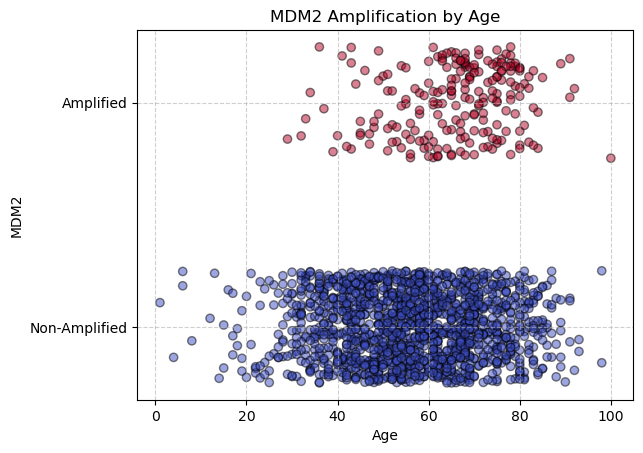

In [186]:
x = df["age"]
y = df["mdm2"].astype(int)
y_jittered = y + 0.5 * (np.random.rand(df.shape[0]) - 0.5)  # spread values

plt.scatter(x, y_jittered, c=y, cmap="coolwarm", edgecolors="k", alpha=0.5)
plt.xlabel("Age")
plt.ylabel("MDM2")
plt.yticks([0, 1], ["Non-Amplified", "Amplified"])
plt.title("MDM2 Amplification by Age")
plt.grid(True, linestyle="--", alpha=0.6)

### MDM2 vs Gender

In [187]:
# split into cases
male = df[df["gender"] == "m"]
female = df[df["gender"] == "f"]

p_male = male["mdm2"].sum() / male.shape[0]
p_female = female["mdm2"].sum() / female.shape[0]

print(f"P(MDM2 | male) = {p_male}")
print(f"P(MDM2 | female) = {p_female}")

P(MDM2 | male) = 0.1475748194014448
P(MDM2 | female) = 0.09738372093023256


### MDM2 vs Location

Text(0.5, 1.0, 'MDM2 Amplification by Location')

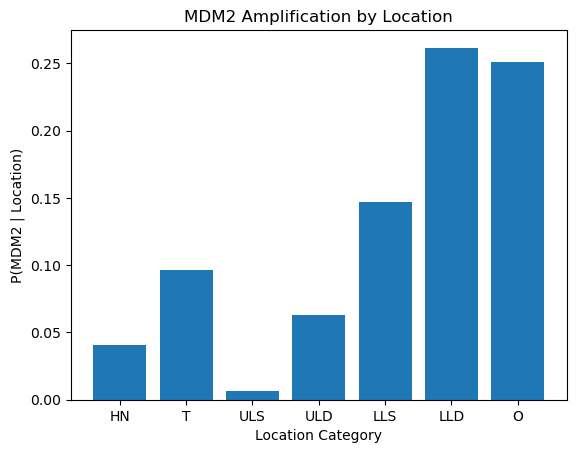

In [188]:
# calculate
groupby = df.groupby("location")
accum = groupby["mdm2"].mean()

# display order
order = ["hn", "t", "uls", "uld", "lls", "lld", "o"]
accum = accum[order]

plt.bar(accum.index.str.upper(), accum)
plt.xlabel("Location Category")
plt.ylabel("P(MDM2 | Location)")
plt.title("MDM2 Amplification by Location")

In [189]:
# re-categorise
sub_df = df.copy()
sub_df["location"] = sub_df["location"].map({
    "hn": "sup",
    "t": "deep",
    "uls": "sup",
    "uld": "deep",
    "lls": "sup",
    "lld": "deep",
    "o": np.nan
})
# split into cases
sup = sub_df[sub_df["location"] == "sup"]
deep = sub_df[sub_df["location"] == "deep"]

p_sup = sup["mdm2"].sum() / sup.shape[0]
p_deep = deep["mdm2"].sum() / deep.shape[0]

print(f"P(MDM2 | superficial) = {p_sup}")
print(f"P(MDM2 | deep) = {p_deep}")

P(MDM2 | superficial) = 0.05394190871369295
P(MDM2 | deep) = 0.1299126637554585


### MDM2 vs Size

Text(0.5, 1.0, 'Size Distribution')

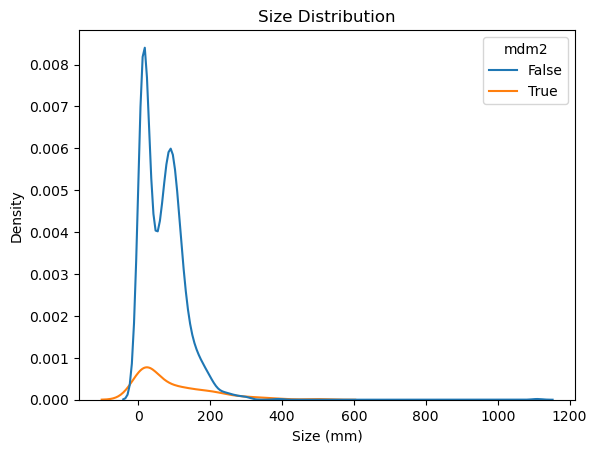

In [203]:
positive = df[df["mdm2"] == True]
negative = df[df["mdm2"] == False]

sns.kdeplot(df, x="size", hue="mdm2")
plt.xlabel("Size (mm)")
plt.title("Size Distribution")